In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#data preprocessing
df.drop(columns='customerID', inplace=True)

In [5]:
df.duplicated().sum()

22

In [6]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#check unique values 
cols = df.columns
for i in cols:
    print(i, df[i].unique(),'\n')

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


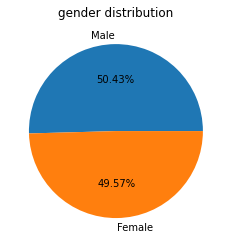

In [18]:
#Exploratory data analysis
#gender distribution
plt.pie(df['gender'].value_counts(), labels=['Male','Female'], autopct='%1.2f%%')
plt.title('gender distribution')
plt.show()

Text(0.5, 1.0, 'Senior citizen')

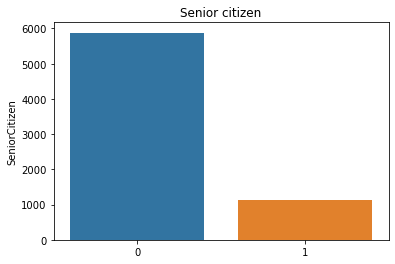

In [19]:
#distirbution based on age.
sns.barplot(y=df['SeniorCitizen'].value_counts(), x=df['SeniorCitizen'].unique()).set_title('Senior citizen')

Text(0.5, 1.0, 'partner distribution')

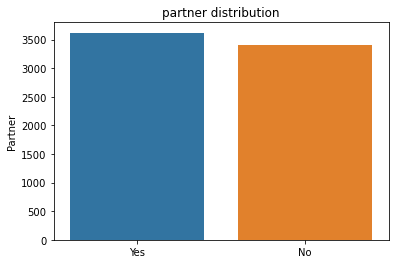

In [21]:
#partner distribution
sns.barplot(y=df['Partner'].value_counts(), x=df['Partner'].unique()).set_title('partner distribution')

Text(0.5, 1.0, 'Dependents')

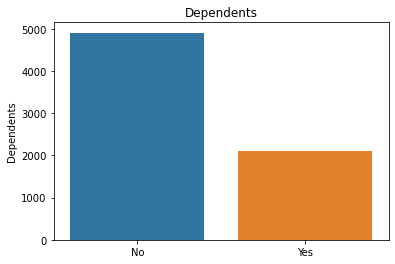

In [22]:
#dependent distribution
sns.barplot(y=df['Dependents'].value_counts(), x=df['Dependents'].unique()).set_title('Dependents')

The graphics show customer demographics:
- The number of men and women are almost same. Younger people are a larger demographic when compared to senior citizens. 
- Number of people with partners is slightly higher than number of people without partners.
- Count of people with dependents is more than half of people without dependdents.

Text(0.5, 1.0, 'Streaming Movies')

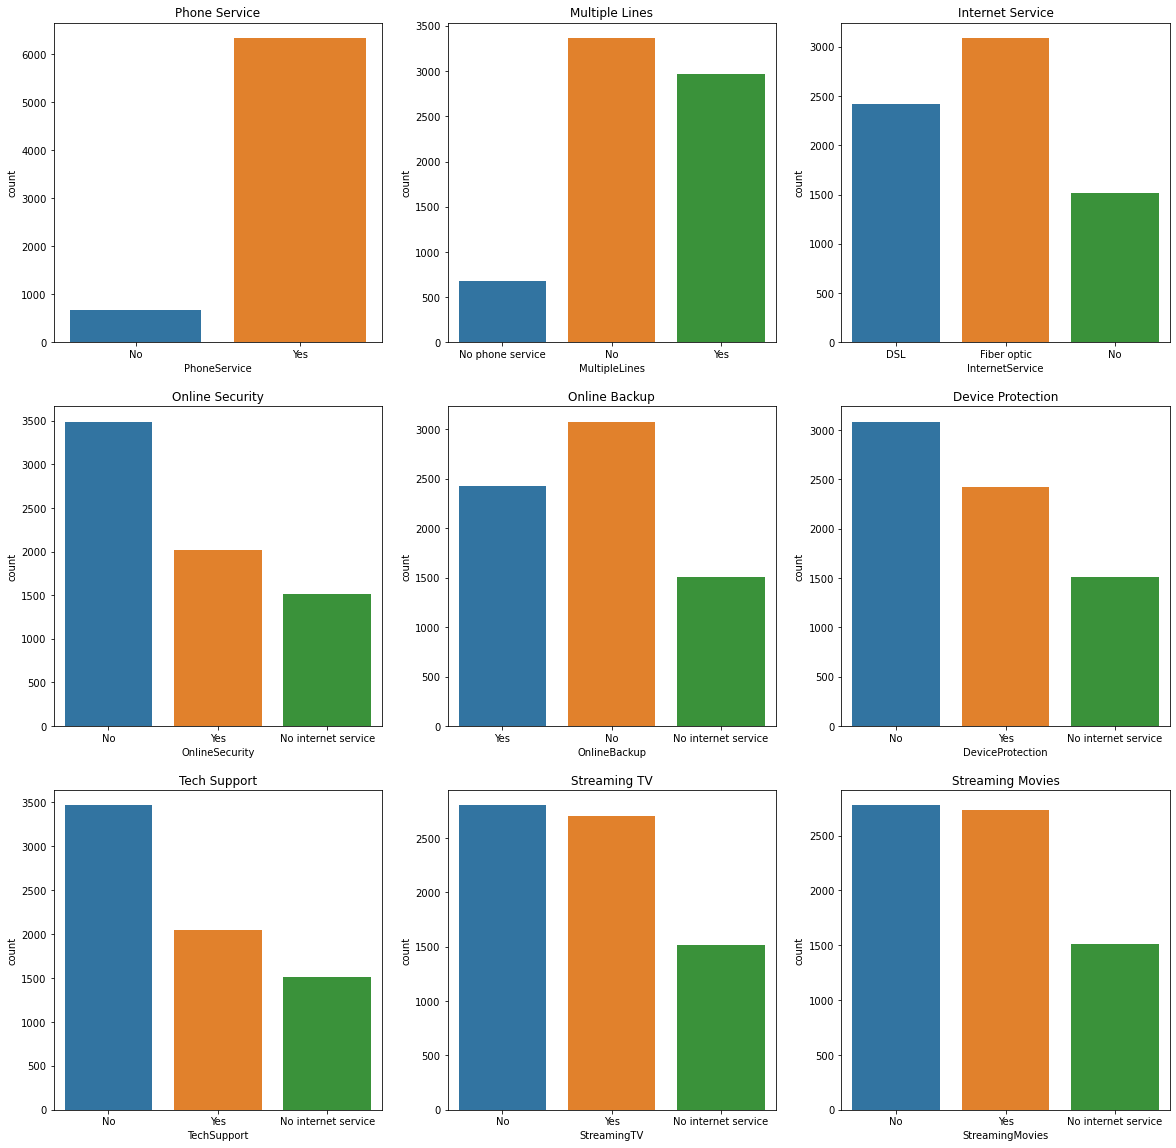

In [23]:
#Services distibution
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
#phone service
sns.countplot(x = df['PhoneService'], ax=ax[0,0]).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
#Multiple Lines
sns.countplot(x = df['MultipleLines'], ax=ax[0,1]).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')
#Internet Service
sns.countplot(x = df['InternetService'], ax=ax[0,2]).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
#Online Security
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0]).set_title('Online Security')
ax[1,0].set_title('Online Security')
#Online Backup
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1]).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
#Device Protection
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2]).set_title('Device Protection')
ax[1,2].set_title('Device Protection')
#Tech Support
sns.countplot(x = df['TechSupport'], ax=ax[2,0]).set_title('Tech Support')
ax[2,0].set_title('Tech Support')
#Streaming TV
sns.countplot(x = df['StreamingTV'], ax=ax[2,1]).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
#Streaming Movies
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2]).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')

The above graphics represent:
- A majority of people have phone service. Of these people close to half have multiple lines.
- Among people with internet services, Optic fiber has the highest number follower by DSL.
- Other services like Tech support, online backup, device protection have lower number of people opting for them.
- Streaming TV and streaming movies have almost the same number of people who have and havent opted for those services.

From these graphs, it is possible to conclude that apart from phone and internet services, streaming services have almost 50-50 split between customers opting for or not opting them. Hence, the company should focus on providing better services and incentives to tempt customers to opt for these services.

Text(0.5, 1.0, 'Contract Type')

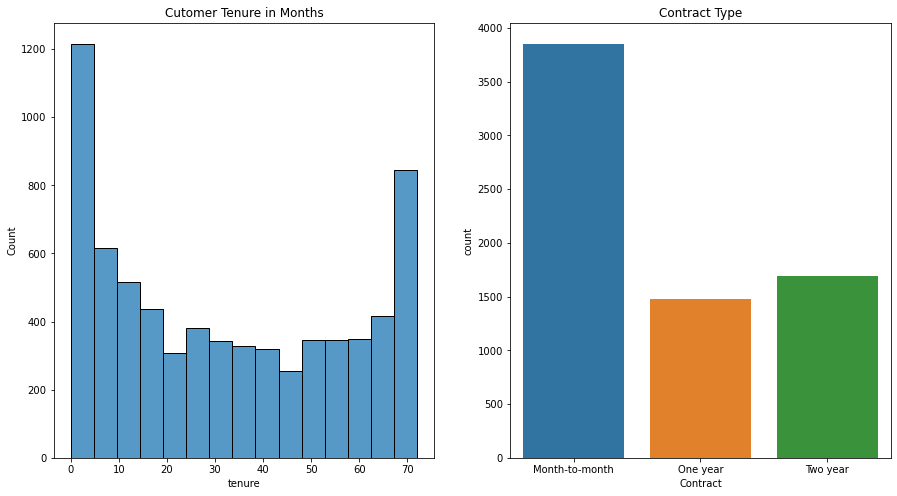

In [24]:
#Tenure/Contract type
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0]).set_title('Cutomer Tenure in Months')
sns.countplot(x = 'Contract', data = df, ax= ax[1]).set_title('Contract Type')

From the graphs above we can see that:
- Most customers have a tenure of less than 5 months. Conversely month-to-month has the highest number of contract types.
- Highest tenure is around 65-70 months. 
- Two year contracts are the next most popular contracts after month-to-month
- Lowest tenure is between 40-50 months.

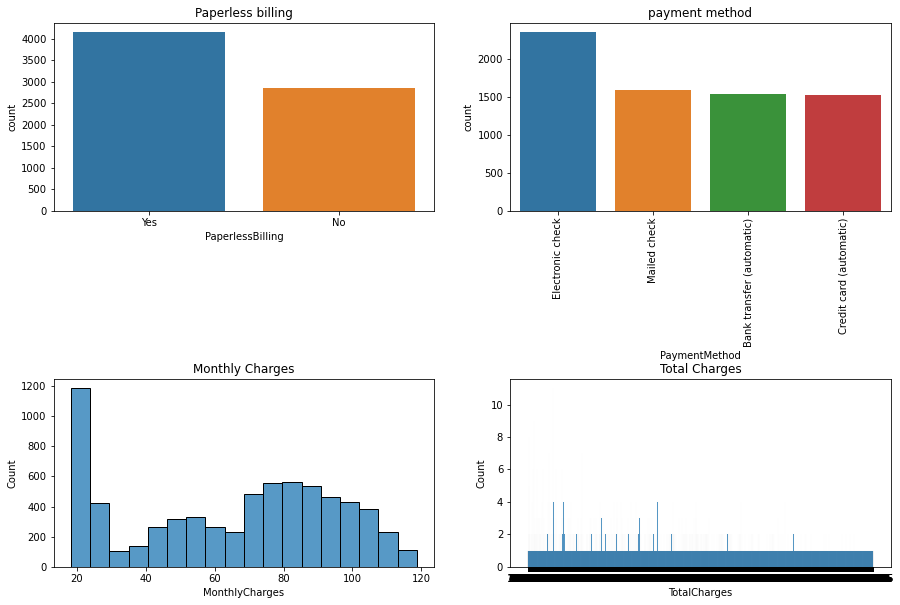

In [35]:
#billing and charges
#PaperlessBilling	PaymentMethod	MonthlyCharges	TotalCharges

fig, ax = plt.subplots(2,2,figsize=(15,10))
fig.subplots_adjust(hspace=0.9)

#paperless billing
sns.countplot(df['PaperlessBilling'], ax=ax[0,0]).set_title('Paperless billing')

#Payment method
sns.countplot(df['PaymentMethod'], ax=ax[0,1]).set_title('payment method')
ax[0,1].xaxis.set_tick_params(rotation=90)

#monthly charges
sns.histplot(x = 'MonthlyCharges', data = df, ax = ax[1,0]).set_title('Monthly Charges')

#Total Charges
sns.histplot(x='TotalCharges', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Total Charges')

plt.show()


From the above graphs we can concur that:
- Most of the population prefer paperless billing. There are multiple other methods including cheques, bank transfers and credit cards,  which a majority of the population prefers.
- Majority of customers pay nearly 20 dollars a month. 
- From the above information we can conclude that the company mainly has customers with low charges, which means the company should focus on providing cheaper options to customers with high charges incentive to stay with the service for longer.

Text(0.5, 1.0, 'churn count')

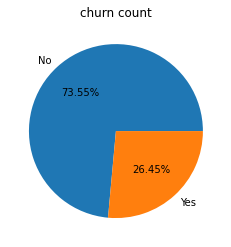

In [37]:
#churn count
plt.pie(x=df['Churn'].value_counts(), labels=df['Churn'].unique(), autopct='%1.2f%%')
plt.title('churn count')

Text(0.5, 1.0, 'Dependents and Churn')

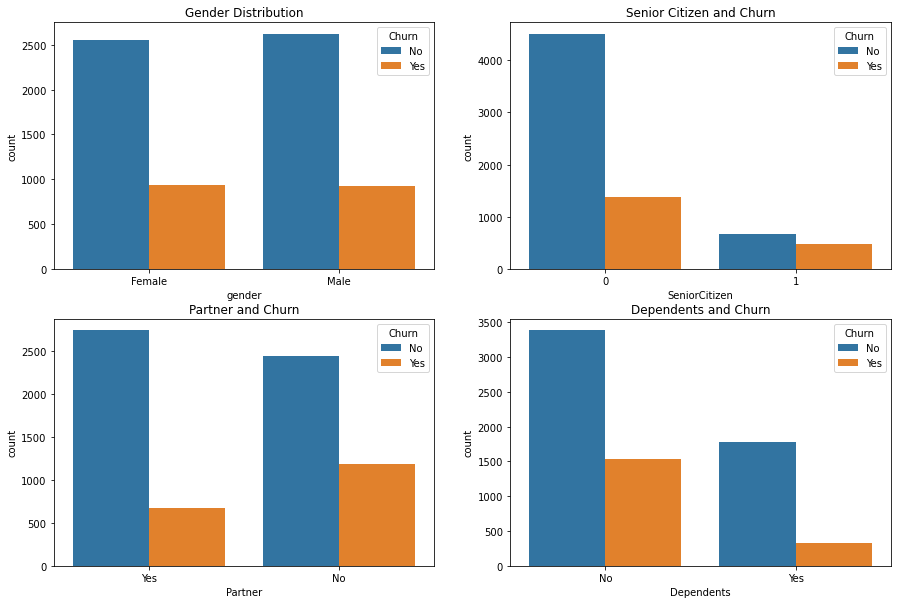

In [38]:
#Relationship between independent variables and target variables
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Gender Distribution
sns.countplot(x = 'gender', data = df, hue = 'Churn', ax=ax[0,0])
ax[0,0].set_title('Gender Distribution')

#Senior Citizen Distribution
sns.countplot(x = df['SeniorCitizen'], ax=ax[0,1], hue = df['Churn']).set_title('Senior Citizen and Churn')

#Partner Distribution
sns.countplot( x = df['Partner'], ax=ax[1,0], hue = df['Churn']).set_title('Partner and Churn')

#Dependents Distribution
sns.countplot(x = df['Dependents'], ax=ax[1,1], hue = df['Churn']).set_title('Dependents and Churn')

From the above graphs we can concur that:
- Churn rate between male and female customers are the same, so there is no relation between gender and customer churn.
- Senior citizens have lesser churn rate compared to non senior citizens.
- People with partners or dependents have lower churn than people without partners or dependents.


Text(0.5, 1.0, 'Streaming Movies')

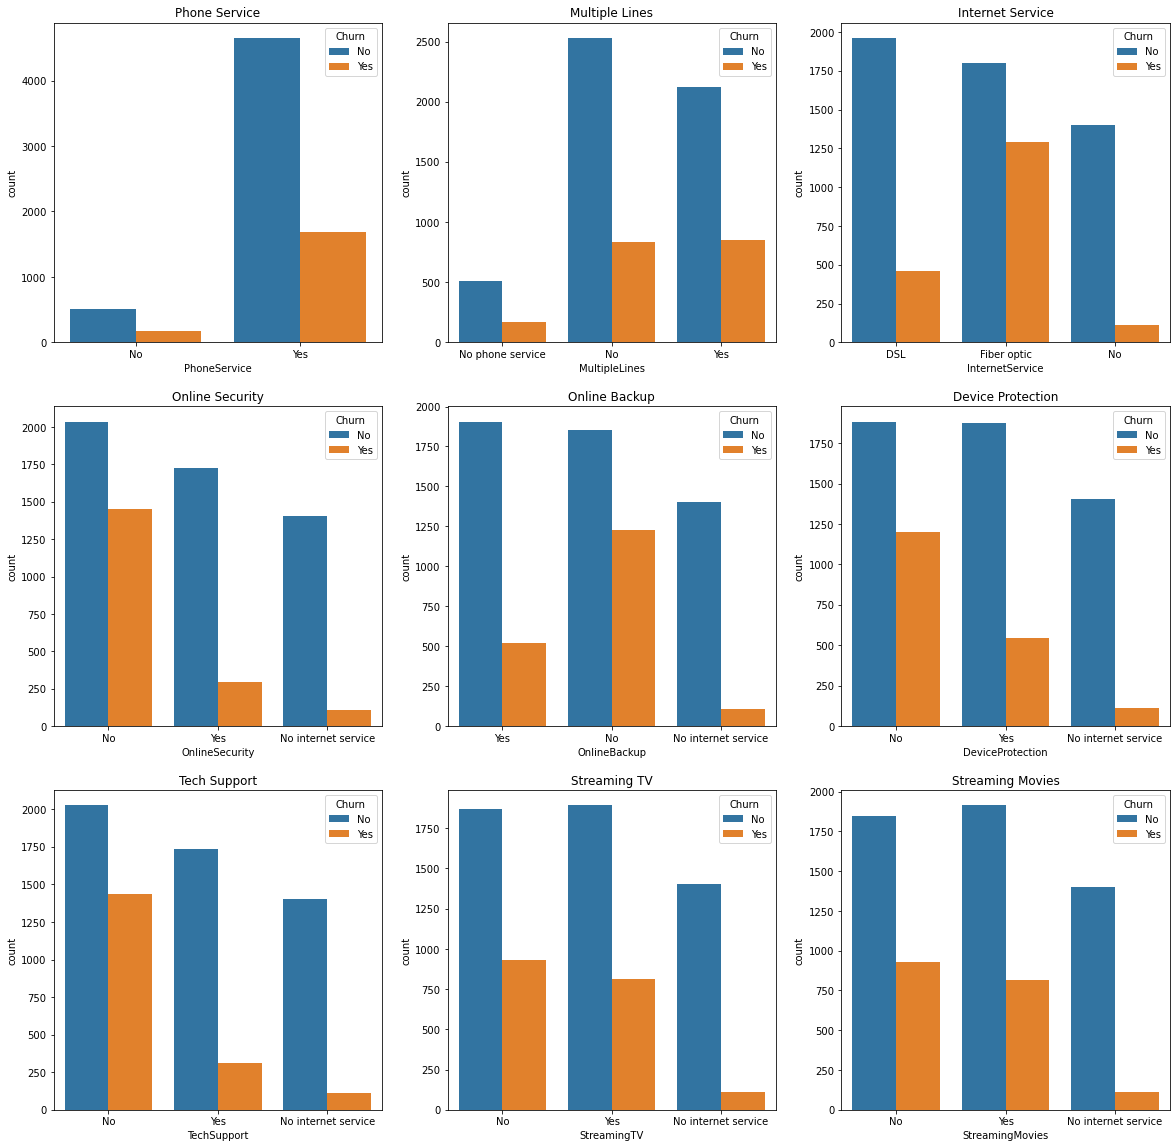

In [39]:
#relationship between Services and churn
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
#phone service
sns.countplot(x = df['PhoneService'], ax=ax[0,0], hue = df['Churn']).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
#Multiple Lines
sns.countplot(x = df['MultipleLines'], ax=ax[0,1], hue = df['Churn']).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')
#Internet Service
sns.countplot(x = df['InternetService'], ax=ax[0,2], hue = df['Churn']).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
#Online Security
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0], hue = df['Churn']).set_title('Online Security')
ax[1,0].set_title('Online Security')
#Online Backup
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1], hue = df['Churn']).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
#Device Protection
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2], hue = df['Churn']).set_title('Device Protection')
ax[1,2].set_title('Device Protection')
#Tech Support
sns.countplot(x = df['TechSupport'], ax=ax[2,0], hue = df['Churn']).set_title('Tech Support')
ax[2,0].set_title('Tech Support')
#Streaming TV
sns.countplot(x = df['StreamingTV'], ax=ax[2,1], hue = df['Churn']).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
#Streaming Movies
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2], hue = df['Churn']).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')

From the graphs above:
- Customers with phone lines, internet and multiple lines have a higher churn rate than without. 
- Customers who have not opted for online security, backup and device protection have higher churn rate.

Text(0.5, 1.0, 'Contract Type and Churn')

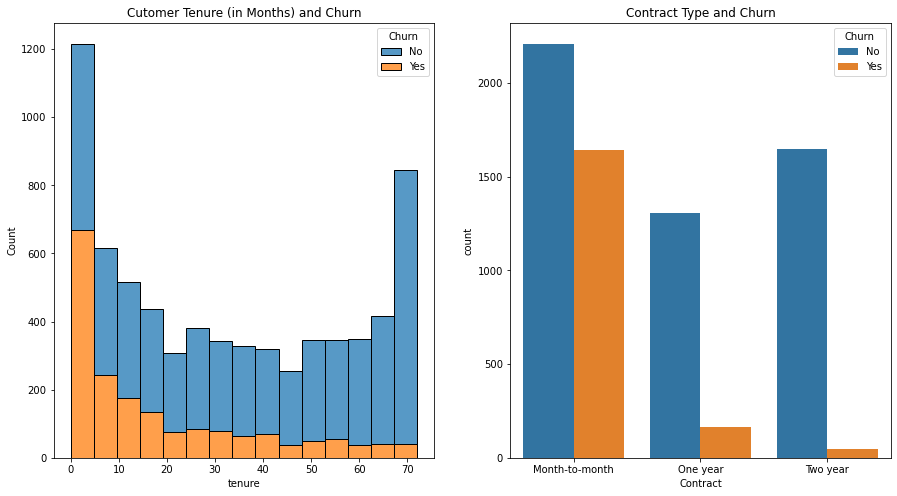

In [40]:
#Relation between Tenure/contract and churn
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0], hue = 'Churn', multiple = 'stack').set_title('Cutomer Tenure (in Months) and Churn')
sns.countplot(x = 'Contract', data = df, ax= ax[1], hue = 'Churn').set_title('Contract Type and Churn')

Looking at the above graphs we can see that:
- Customers with lowest tenure and tenure less than 5 months have highest churn.
- Cutomers with month-to-month contracts have a higher churn count as compared to those with a two year contract. Which proves our assumption that customers with longer contracts have lower churn.

Text(0.5, 1.0, 'Total Charges')

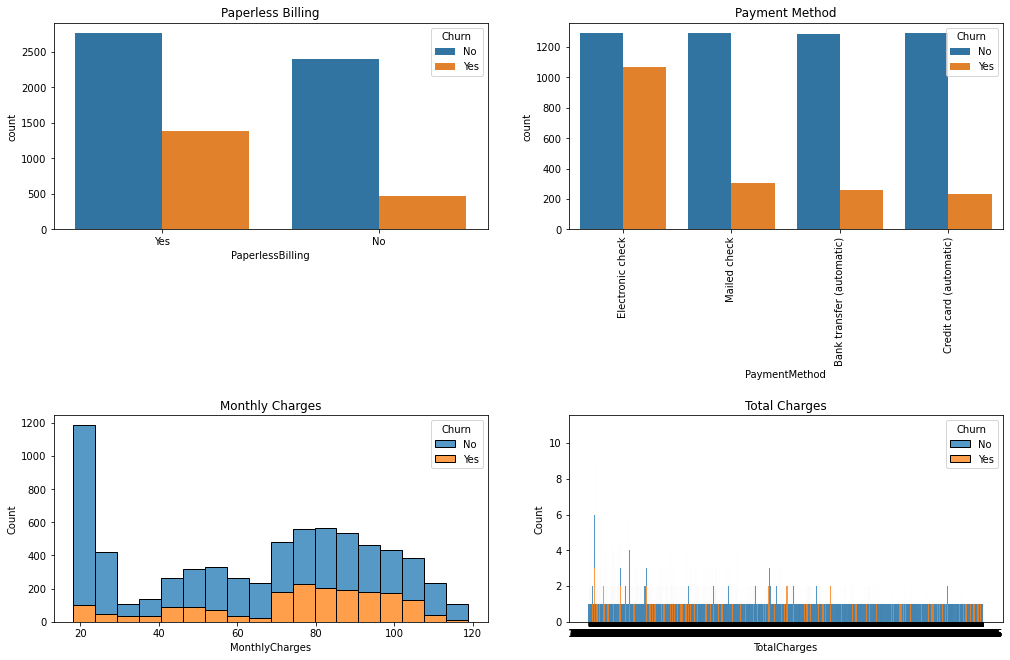

In [41]:
#relationship between billing and churn
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

#spacing between subplots
fig.subplots_adjust(hspace=0.9)


#papaerless billing
sns.countplot(x = df['PaperlessBilling'], ax=ax[0,0], hue = df['Churn']).set_title('Paperless Billing')

#Payment Method
sns.countplot(x = df['PaymentMethod'], ax=ax[0,1], hue = df['Churn']).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)

#Monthly Charges
sns.histplot(x = 'MonthlyCharges', data = df, ax = ax[1,0], hue = 'Churn', multiple= 'stack').set_title('Monthly Charges')

#Total Charges
sns.histplot(x = 'TotalCharges', data = df, ax = ax[1,1], hue = 'Churn', multiple= 'stack').set_title('Total Charges')

From the graphs above we can see that:
- Customers with higher monthly charges have higher count which makes sense because they might not want to pay for all the extra services if they are not using them.

In [43]:
#Data preprocessing
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3-Q1

#Removing the outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [45]:
#label encoding
from sklearn.preprocessing import LabelEncoder
cols = df.columns[df.dtypes == 'object']
le = LabelEncoder()

#encoding columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique(), '\n')

gender [0 1] 

Partner [1 0] 

Dependents [0 1] 

PhoneService [0 1] 

MultipleLines [1 0 2] 

InternetService [0 1 2] 

OnlineSecurity [0 2 1] 

OnlineBackup [2 0 1] 

DeviceProtection [0 2 1] 

TechSupport [0 2 1] 

StreamingTV [0 2 1] 

StreamingMovies [0 2 1] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [2 3 0 1] 

TotalCharges [2505 1466  157 ... 2994 2660 5407] 

Churn [0 1] 



In [46]:
#eature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

<AxesSubplot:>

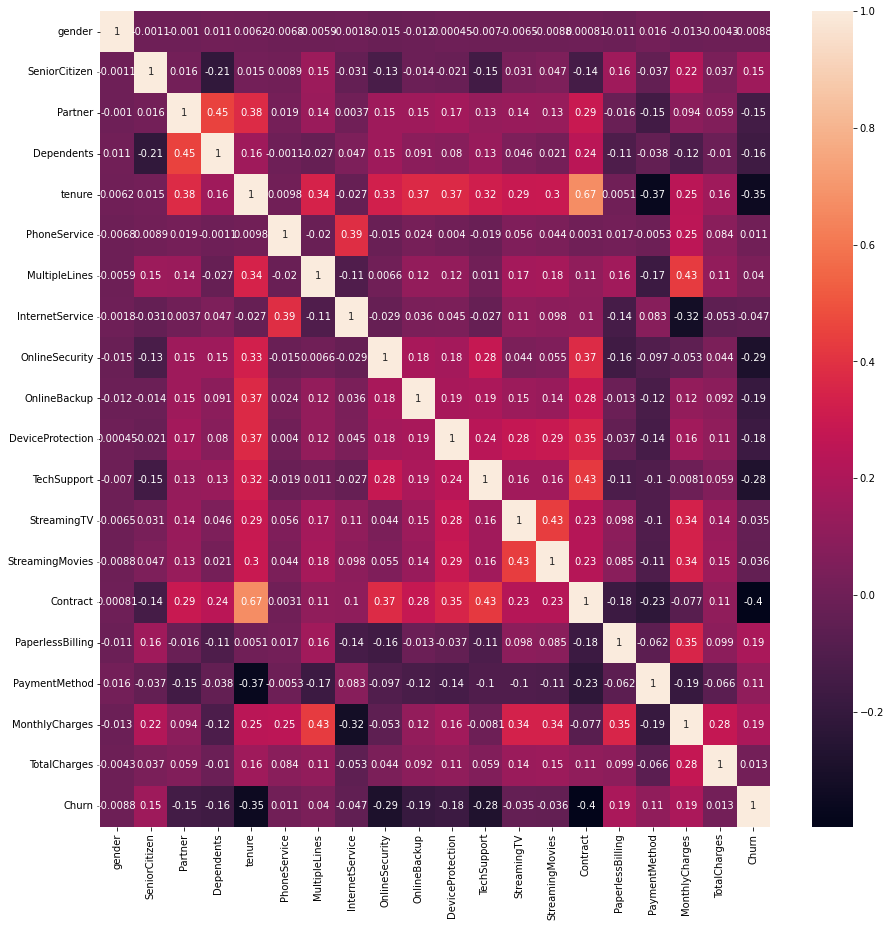

In [47]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [48]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), df['Churn'], test_size=0.2, random_state = 42)

### Model building
The models we will be using today are:
- Decision tree classifier
- Random Forest classifier
- K Nearest Neighbors

In [49]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [53]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

grid_search = GridSearchCV(estimator = tree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 0}


In [63]:
#using above information we will run the decision tree again
tree = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=10, min_samples_split=2, random_state=0)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print(tree.score(X_train, y_train))

0.8043091168091168


In [56]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [58]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [59]:
forest = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the data
forest.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', forest.score(X_train, y_train))

#Predicting the values
r_pred = forest.predict(X_test)

Training Accuracy:  0.8376068376068376


In [60]:
#K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [61]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'n_neighbors': [2,4,6,8,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

#Grid Search Object with KNN Classifier
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}


In [62]:
#KNN Classifier Object with best parameters
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=10, weights='uniform')

#Fitting the data
knn.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', knn.score(X_train, y_train))

#Predicting the values
k_pred = knn.predict(X_test)

Training Accuracy:  0.8132122507122507


<AxesSubplot:title={'center':'KNN'}, xlabel='Churn', ylabel='Density'>

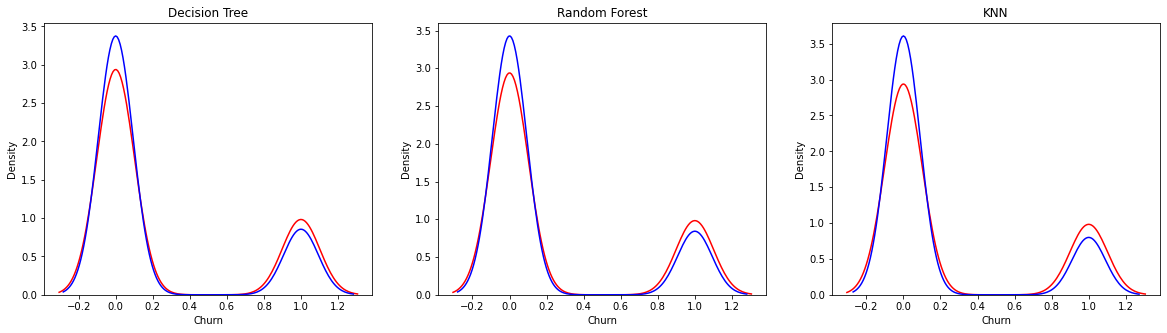

In [64]:
#distribution plot
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

#Decision Tree 
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0]).set_title('Decision Tree')
sns.distplot(tree_pred, hist=False, color="b", label="Fitted Values" , ax=ax[0])

#Random Forest
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1]).set_title('Random Forest')
sns.distplot(r_pred, hist=False, color="b", label="Fitted Values" , ax=ax[1])

#KNN
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[2]).set_title('KNN')
sns.distplot(k_pred, hist=False, color="b", label="Fitted Values" , ax=ax[2])

In [66]:
#classification report
from sklearn.metrics import classification_report

print('Decision Tree Classification Report: \n', classification_report(y_test, tree_pred))

print('Random Forest Classification Report: \n', classification_report(y_test, r_pred))

print('KNN Classification Report: \n', classification_report(y_test, k_pred))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1053
           1       0.58      0.47      0.52       352

    accuracy                           0.78      1405
   macro avg       0.70      0.68      0.69      1405
weighted avg       0.77      0.78      0.77      1405

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1053
           1       0.63      0.49      0.55       352

    accuracy                           0.80      1405
   macro avg       0.74      0.70      0.71      1405
weighted avg       0.79      0.80      0.79      1405

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1053
           1       0.59      0.43      0.50       352

    accuracy                           0.78      1405
   macro avg       0.

### Conclusion

From EDA we realised that senior citizens had a lower churn rate than younger customers. We were also able to find out that single people who dont have dependents and partners had a higher churn rate. Customers seem to prioratise streaming services more than other services.'\n'
We also observed that customers with higher montly rates had a higher churn rate than the ones with lower rates. Therefore the company should focus on reducing rates in order to reduce churn. 
Comparing the three models we used , Random Forest classifier has the highest accuracy and F1 score. We can consider this model to be a good fit to predict churn in future.